In [9]:
#Bibliotecas Utilizadas
from math import  *
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Definição dos Parâmetros
L_aleta = 0.2
h = 20
r = 0.12
k_al = 240
T_amb = 25 + 273
T_base = 100 +273
A_secao_transversal = pi*(r**2)
P = 2*pi*r


In [11]:
#Funções
def temperatura_aleta_ponto_convecao(P,area_transversal,L,x,h,k,T_base,T_ambiente):
    m =((h*P)/(k*area_transversal))**0.5
    razao = (cosh(m*(L-x))+(h/(m*k))*sinh(m*(L-x)))/(cosh(m*L)+(h/(m*k))*sinh(m*L))
    teta_b = T_base-T_ambiente
    return razao*teta_b +T_ambiente


def taxa_qa_convecao(P,area_transversal,L,h,k,T_base,T_ambiente):
    m =((h*P)/(k*area_transversal))**0.5
    teta_b = T_base-T_ambiente
    M= teta_b*((h*P*k*area_transversal)**0.5)
    taxa = M*(sinh(m*L)+(h/(m*k))*cosh(m*L))/(cosh(m*L)+(h/(m*k))*sinh(m*L))
    return taxa

def taxa_qa_infinito(P,area_transversal,h,k,T_base,T_ambiente):
    teta_b = T_base-T_ambiente
    M= teta_b*((h*P*k*area_transversal)**0.5)
    return M

# Questão 1

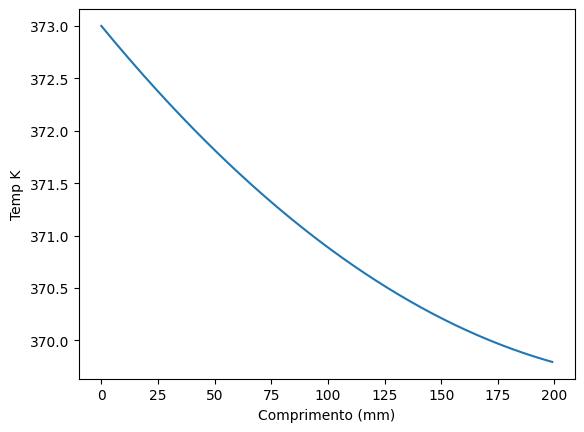

In [12]:
#a)
lista_temperaturas = []
lista_intervalo = np.arange(0, 0.2, 0.001)

for i in lista_intervalo:
    lista_temperaturas.append(temperatura_aleta_ponto_convecao(P,A_secao_transversal,L_aleta,i,h,k_al,T_base,T_amb))



plt.plot(lista_intervalo*1000,lista_temperaturas)
plt.xlabel("Comprimento (mm)")
plt.ylabel("Temp K")
plt.show()


In [13]:
#b)
qa = taxa_qa_convecao(P,A_secao_transversal,L_aleta,h,k_al,T_base,T_amb)
print("A taxa de transferência de calor é: {:.2f}".format(qa))

A taxa de transferência de calor é: 285.29


In [14]:
#c)
A_superficie_aleta = A_secao_transversal+ 2*(pi*r*L_aleta)
q_superficie = qa/(h*A_superficie_aleta*T_base)
print("A eficiência é de {:.2f}".format(q_superficie))

A eficiência é de 0.20


In [15]:
#d)
e = qa/(h*A_secao_transversal*T_base)
print("A efetividade é de {:.2f}".format(e))

A efetividade é de 0.85


In [16]:
#e)
qa_infinito = taxa_qa_infinito(P,A_secao_transversal,h,k_al,T_base,T_amb)
print("A taxa de transfêrencia para hipótese infinita é de {:.2f}".format(qa_infinito))

A taxa de transfêrencia para hipótese infinita é de 959.66


f)
A taxa de transferência para a hipótese da aleta com comprimento infinito é maior que a de conveção para o comprimento utilizado,uma vez que possui uma maior superfície de contato com o ambiente

g)

Como para aleta infinita uma das condições é que  $\theta_{L}= 0$, ou seja $T_{b} - T_{amb} = 0$.

Como $T_{b} = T_{amb}$, não há troca de calor entre a extremidade da aleta e o ambiente, podendo considerar-se uma troca adiábatica, ou seja podemos igualar a formula do cálculo da  taxa de transferência da aleta em caso de troca adiábatica e da aleta infinita para descobir o comprimento aproximado que transforma a taxa da hipótese infinita forneça uma medida precisa.

Sendo assim:



\begin{align}
q_{a} = M = M\tanh(mL)
\end{align}

\begin{align}
\tanh(mL) = \frac{q_{a}}{M}
\end{align}

\begin{align}
mL = \tanh(\frac{q_{a}}{M})^{-1}
\end{align}

\begin{align}
L = \frac{(\tanh(\frac{q_{a}}{M})^{-1})}{m}

\end{align}

\begin{align}
L = \frac{(\tanh(\frac{M}{M})^{-1})}{m}

\end{align}

\begin{align}
L = \frac{(\tanh(1)^{-1})}{m}

\end{align}

Como $\tanh(1)^{-1} = \infty$, podemos aproximar para $\tanh(0.999)^{-1}$

In [17]:
#Implementando a matemática
m =((h*P)/(k_al*A_secao_transversal))**0.5
L = atanh(0.999)/m

print("Taxa aleta infinita: {:.2f}, taxa por convecção {:.2f}.".format(qa_infinito, taxa_qa_convecao(P,A_secao_transversal,L,h,k_al,T_base,T_amb)))
print("O comprimento para transformar a taxa da hipótese da aleta infinita em  uma medida precisa é  de {:.2f} m.".format(L))

Taxa aleta infinita: 959.66, taxa por convecção 958.83.
O comprimento para transformar a taxa da hipótese da aleta infinita em  uma medida precisa é  de 3.22 m.


# Questao2

a)

Como foi dada a hipótese da aleta infinita, pode-se utilizar a seguinte relação:

\begin{align}
\frac{\theta}{\theta_{b}} = e^{-mx}
\end{align}

Desse modo para determinar a condutividade térmica basta isola-la:

\begin{align}
\frac{\theta}{\theta_{b}} = e^{-mx}
\end{align}

\begin{align}
ln(\frac{\theta}{\theta_{b}}) = {-mx}
\end{align}


\begin{align}
x = -\frac{ln(\frac{\theta}{\theta_{b}})}{m}
\end{align}

\begin{align}
-\frac{ln(\frac{\theta_{A}}{\theta_{b}})}{m_{A}} = -\frac{ln(\frac{\theta_{B}}{\theta_{b}})}{m_{B}}
\end{align}

\begin{align}
ln(\frac{\theta_{A}}{\theta_{B}})m_{B} = ln(\frac{\theta_{B}}{\theta_{b}})m_{A}
\end{align}

Como $m = \sqrt{\frac{hP}{kA_{tr}}}$:

\begin{align}
m_{B} = \frac{ln(\frac{\theta_{B}}{\theta_{b}})m_{A}}{ln(\frac{\theta_{A}}{\theta_{B}})}
\end{align}

\begin{align}
\frac{hP}{k_{B}A_{tr}} = \frac{hP}{k_{A}A_{tr}} (\frac{ln(\frac{\theta_{B}}{\theta_{b}})}{ln(\frac{\theta_{A}}{\theta_{B}})})^2
\end{align}


\begin{align}
\frac{1}{k_{B}} = \frac{1}{k_{A}}(\frac{ln(\frac{\theta_{B}}{\theta_{b}})}{ln(\frac{\theta_{A}}{\theta_{B}})})^2
\end{align}


\begin{align}
k_{B} = k_{A}(\frac{ ln(\frac{\theta_{A}}{\theta_{b}})}{ln(\frac{\theta_{B}}{\theta_{b}})})^2
\end{align}


In [24]:
#Definindo as variáveis
ka = 240
T_A = 75+273
T_B = 60+273
Tb = 100 + 273
T_amb = 25 +273


In [37]:
#Função
def acha_condutividade(ka,T_A,T_B,Tb,T_amb):
    teta_A = T_A - T_amb
    teta_B = T_B - T_amb
    teta_Base = Tb - T_amb
    logs = (np.log(teta_A/teta_Base)/np.log(teta_B/teta_Base))**2
    return ka*(logs)

In [38]:
print("A condutividade de kb é {:.2f}".format(acha_condutividade(ka,T_A,T_B,Tb,T_amb)))

A condutividade de kb é 67.93
